In [1]:
import sys
from pathlib import Path

sys.path.insert(0, "..")

In [2]:
from config import *
from src.utils.load_clip import *
from src.utils.indexer import *
from src.utils.search import *
from src.utils.query_reformulate import *
from PIL import Image

c:\Users\LENOVO\Documents\Github\CS336.O11.KHCL\.venv\lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [3]:
import matplotlib.pyplot as plt

def show_image_list(list_images, list_titles=None, grid=False, num_cols=5, figsize=(20, 10), title_fontsize=24):
    if list_titles is not None:
        assert isinstance(list_titles, list)
        assert len(list_images) == len(list_titles), '%d imgs != %d titles' % (len(list_images), len(list_titles))

    num_images  = len(list_images)
    num_cols    = min(num_images, num_cols)
    num_rows    = int(num_images / num_cols) + (1 if num_images % num_cols != 0 else 0)

    # Create a grid of subplots.
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    
    # Create list of axes for easy iteration.
    if isinstance(axes, np.ndarray):
        list_axes = list(axes.flat)
    else:
        list_axes = [axes]

    for i in range(num_images):

        img    = list_images[i]
        title  = list_titles[i] if list_titles is not None else 'Image %d' % (i)
        
        list_axes[i].imshow(img)
        list_axes[i].set_title(title, fontsize=title_fontsize) 
        list_axes[i].grid(grid)

    for i in range(num_images, len(list_axes)):
        list_axes[i].set_visible(False)

    fig.tight_layout()
    _ = plt.show()

In [4]:
query_image = Image.open(DATASET_DIR / "val" / "B000AYI3L4.png")
query_text = "a pink dress with star in the middle"
k = 50

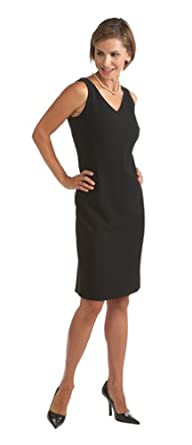

In [5]:
query_image

In [6]:
result_images, result_filenames = search_top_k(query_image, str(query_text), k)

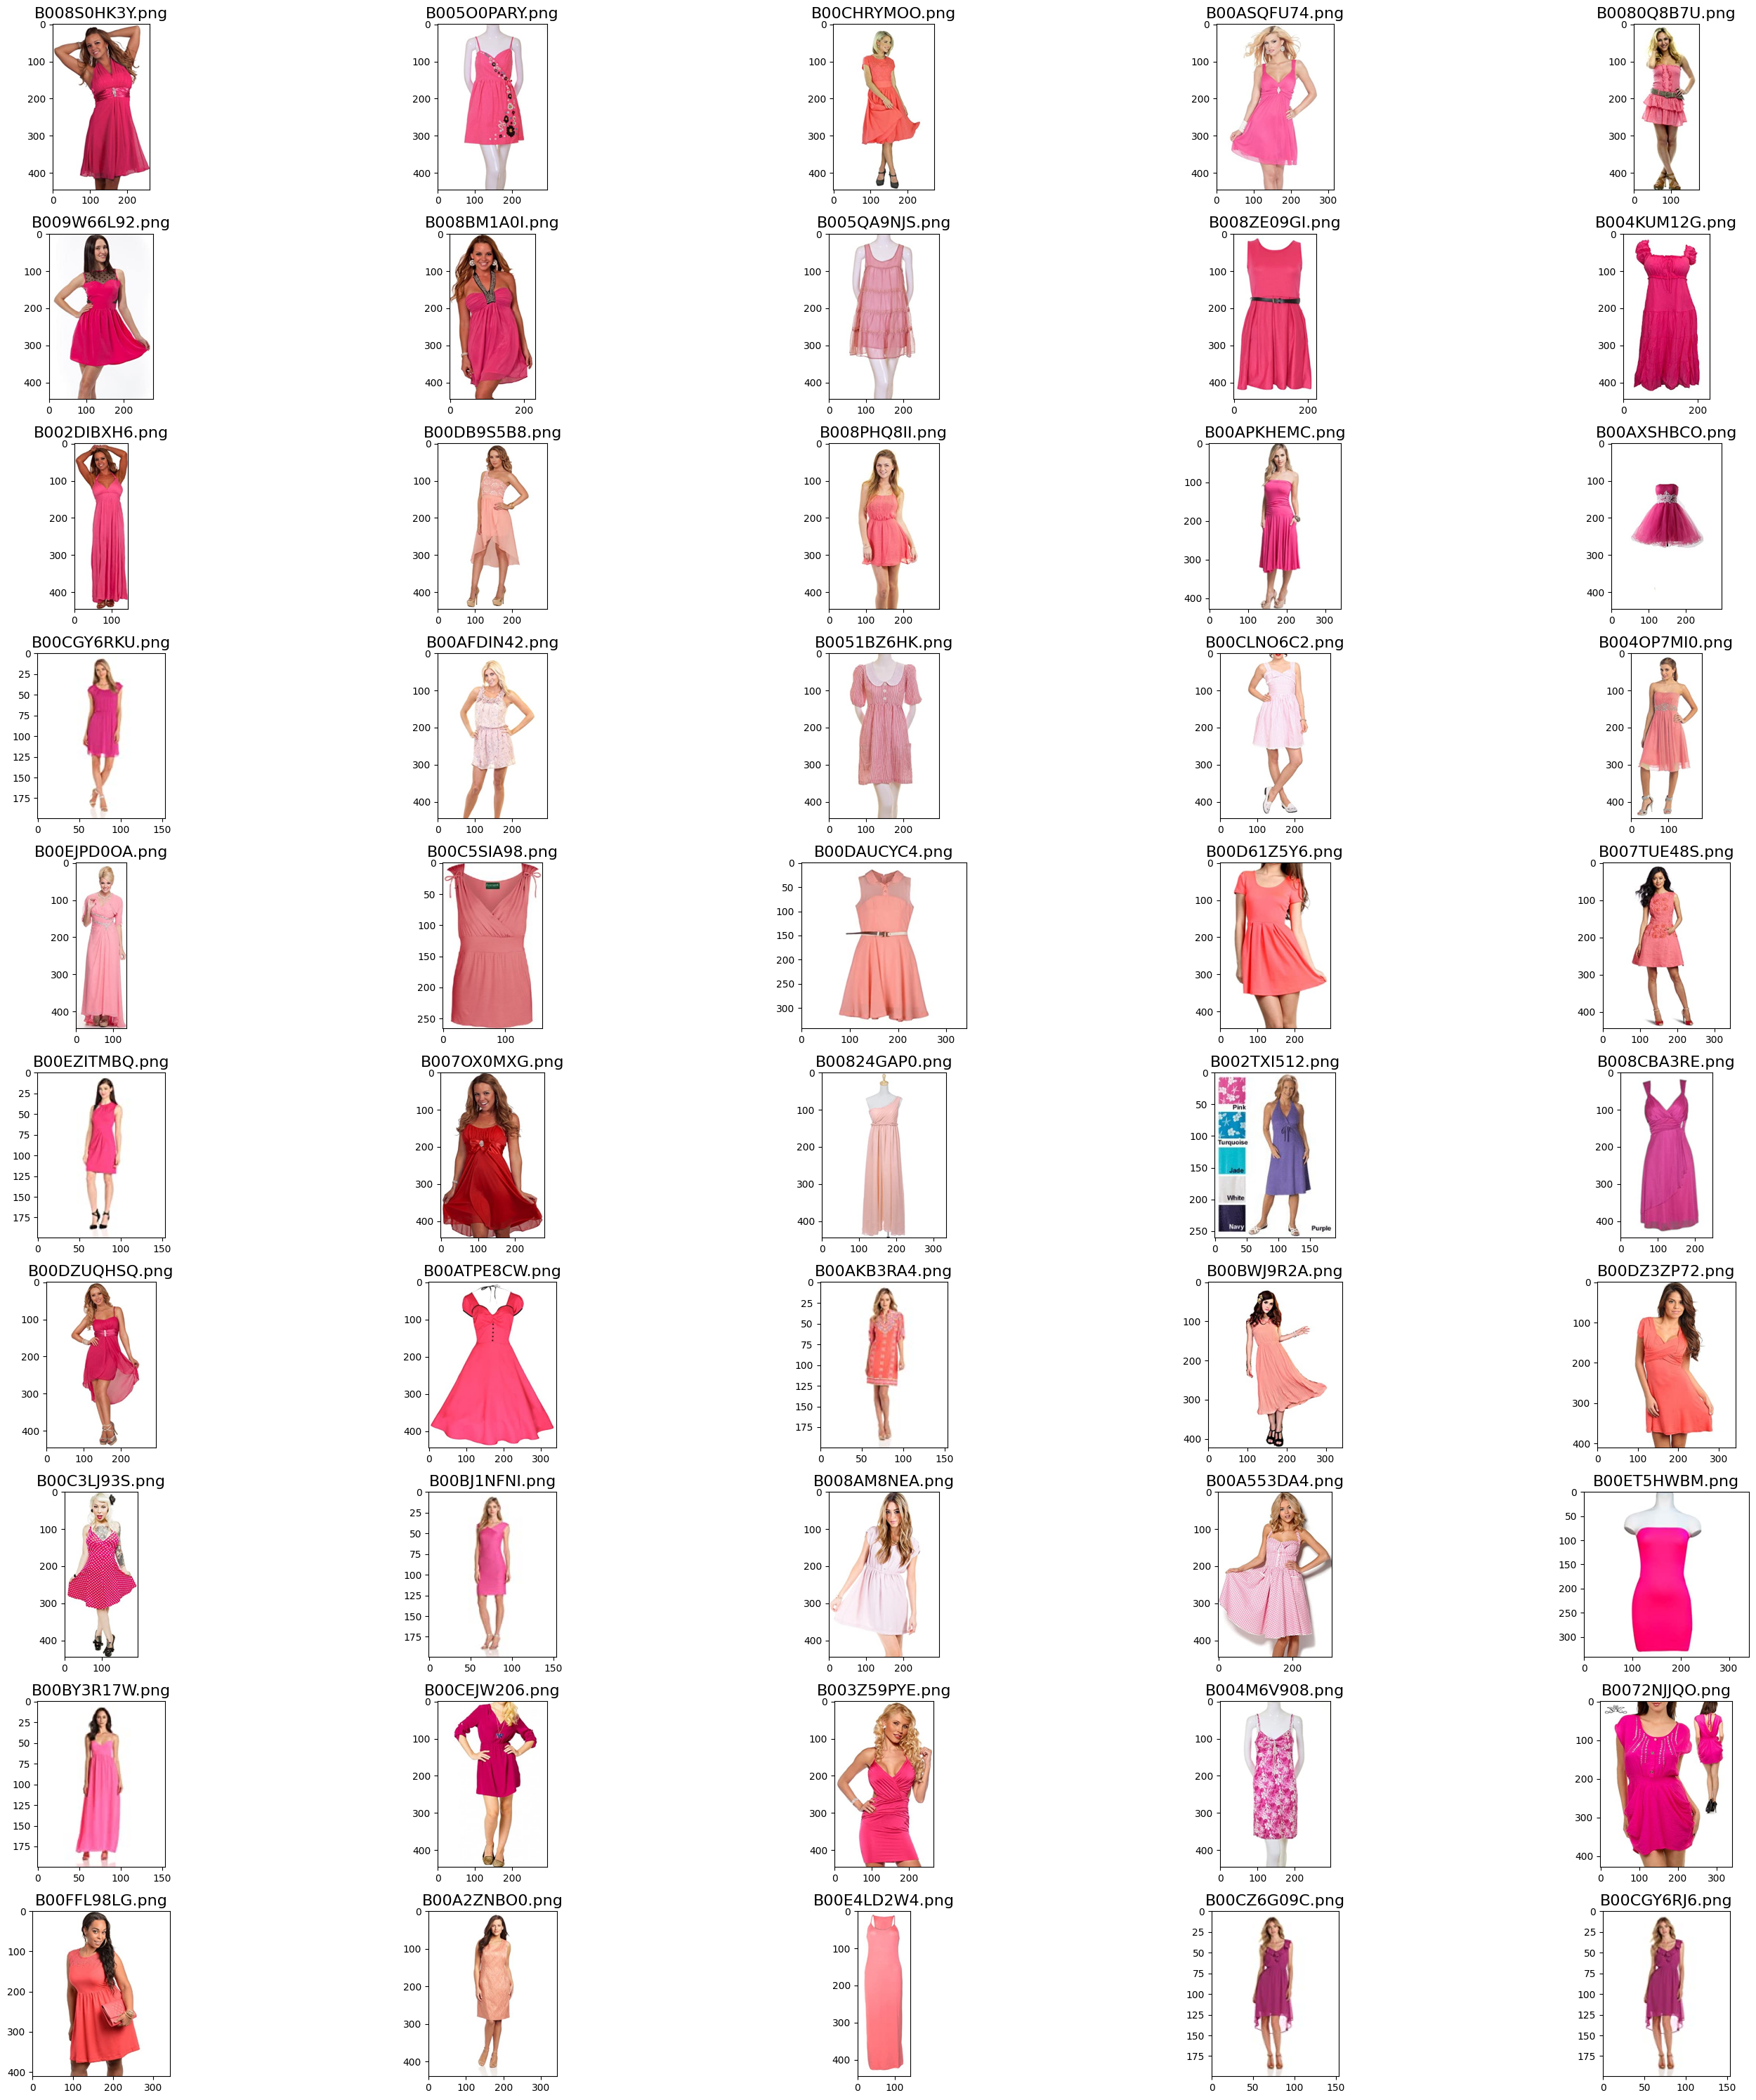

In [7]:
show_image_list(list_images=result_images,
                list_titles=result_filenames,
                num_cols=5,
                figsize=(30, 30),
                grid=False,
                title_fontsize=16)